In [475]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [476]:
dft = pd.read_csv('../data/Mobile Banking Questionnaire.csv')
for i, val in enumerate(dft.columns.values):
    print("{} - {}".format(i, val))

0 - Timestamp
1 - 1. Gender
2 - 2. Age
3 - 3. Where do you live? (District)
4 - 4. What's your occupation?
5 - 5. What's your Education Level?
6 - 6. What's your Monthly income?
7 - 7. How did you get to know about mobile banking?
8 - 8. How long have you been using mobile banking for?
9 - 9. Is your mobile banking service addition to an existing bank account or separate service(Mobile wallet, ex: frimi)?
10 - 10. What types of accounts do you have?
11 - 11. What kind of operations are you doing using the mobile application?
12 - 12.	How often do you use the mobile application to do the above-mentioned tasks
13 - 13. How far is the bank branch where you do business (or live)?
14 - 14. Do you generally send, receive, or do both send and receive?
15 - 15. How do you agree with the following statements? [My mobile banking menu is very easy to navigate]
16 - 15. How do you agree with the following statements? [My mobile banking menu is very easy to understand]
17 - 15. How do you agree wit

In [477]:
df = pd.read_csv('../data/Mobile Banking Questionnaire.csv', header=None)
df.drop(index=0, inplace=True)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
1,2020/11/01 2:23:58 pm GMT+5:30,Male,19 - 30,Gampaha,Private Sector Job,Degree or above,"100,000 - 150,000",Friends,One year to five years,Separate,...,Very relevant,Not relevant,Very relevant,5,YES,Ease of access;24/7 account and service access...,Technology issues;Security issues,Keep it Simple;Lightweight and speed,NaN,4
2,2020/11/01 2:44:58 pm GMT+5:30,Male,19 - 30,Kegalle,Private Sector Job,Degree or above,"100,000 - 150,000",Bank,Less than a year,An addition,...,Relevant,Relevant,Relevant,4,YES,Ease of access;24/7 account and service access...,Security issues;Inconvenient to make deposits,Keep it Simple;Add more features;Lightweight a...,NaN,2


In [478]:
satisfaction = [0,0,0,0,0]
for index, row in df.iterrows():
    try:
        satisfaction[int(row[17])-1] += 1
    except:
        print("Skipped: {}".format(row[17]))
        pass

print(satisfaction)

Skipped: nan
Skipped: nan
Skipped: Not Relevant
[4, 19, 36, 61, 37]


In [479]:
total_responses = df[0].count()
print("Total Responses: {}".format(total_responses))

Total Responses: 160


In [480]:
start_q = 15
no_of_questions = 5
score = np.array([0 for i in range(no_of_questions)])
row_numbers = [int(i) for i in range(start_q, start_q+no_of_questions)]

for i, no in enumerate(row_numbers):
    for index, row in df.iterrows():
        try:
            score[i] += int(row[no])
        except:
            print(row[no])
print(score)
new_score = score - min(score)
print(new_score)

nan
nan
nan
nan
Not Relevant
nan
nan
Not Relevant
Not Relevant
[558 559 579 579 622]
[ 0  1 21 21 64]


In [481]:
# Question 16 

In [482]:
q16_points = {"very relevant":5, "relevant":3, "no idea":0, "not relevant":0}
start_q = 22
no_of_questions = 10
score = np.array([0 for i in range(no_of_questions)])
row_numbers = [int(i) for i in range(start_q, start_q+no_of_questions)]

for i, no in enumerate(row_numbers):
    for index, row in df.iterrows():
        try:
            score[i] += q16_points[row[no].lower()]
        except:
            print(row[no])
print(score)
new_score = score / 160
print(new_score)

nan
[668 681 708 475 301 515 555 668 514 494]
[4.175   4.25625 4.425   2.96875 1.88125 3.21875 3.46875 4.175   3.2125
 3.0875 ]


In [483]:
mobile_user_requiremtns = df[row_numbers + [32]]
replace_dict = {"Very relevant":5, "Relevant":3, "No Idea":0, "Not relevant":0}
mobile_user_requiremtns.replace(replace_dict, inplace=True)
mobile_user_requiremtns.fillna(0, inplace=True)
mobile_user_requiremtns.head()

/home/dulanj/.local/lib/python3.6/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/dulanj/.local/lib/python3.6/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,22,23,24,25,26,27,28,29,30,31,32
1,5,5,5,3,0,3,5,5,0.0,5,5
2,5,5,5,0,0,3,3,3,3.0,3,4
3,3,3,3,3,3,3,3,3,3.0,3,5
4,5,3,3,3,3,3,3,3,3.0,3,4
5,5,5,5,3,3,3,3,5,3.0,3,4


In [484]:
mobile_user_requiremtns['Security'] = (mobile_user_requiremtns[24] + mobile_user_requiremtns[24])/2
mobile_user_requiremtns['User Interface'] = (mobile_user_requiremtns[22]+mobile_user_requiremtns[23]+mobile_user_requiremtns[25])/3
mobile_user_requiremtns['Customer Support'] = (mobile_user_requiremtns[27]+mobile_user_requiremtns[28]+mobile_user_requiremtns[30]+mobile_user_requiremtns[29])/4
mobile_user_requiremtns['Extra Features'] = (mobile_user_requiremtns[30]+mobile_user_requiremtns[25])/2
mobile_user_requiremtns['24x7 Availability'] = (mobile_user_requiremtns[22]+mobile_user_requiremtns[29])/2
mobile_user_requiremtns.astype(np.float64)
mobile_user_requiremtns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1 to 160
Data columns (total 16 columns):
22                   160 non-null int64
23                   160 non-null int64
24                   160 non-null int64
25                   160 non-null int64
26                   160 non-null int64
27                   160 non-null int64
28                   160 non-null int64
29                   160 non-null int64
30                   160 non-null float64
31                   160 non-null int64
32                   160 non-null object
Security             160 non-null float64
User Interface       160 non-null float64
Customer Support     160 non-null float64
Extra Features       160 non-null float64
24x7 Availability    160 non-null float64
dtypes: float64(6), int64(9), object(1)
memory usage: 21.2+ KB


/home/dulanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dulanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dulanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [485]:
mobile_user_requiremtns_cat = mobile_user_requiremtns.drop([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], axis=1)


In [486]:
# for i in mobile_user_requiremtns[24]:
#     print(int(i))

In [487]:
mobile_user_requiremtns_cat.head()

,Security,User Interface,Customer Support,Extra Features,24x7 Availability
1,5.0,4.333333,3.25,1.5,5.0
2,5.0,3.333333,3.00,1.5,4.0
3,3.0,3.000000,3.00,3.0,3.0
4,3.0,3.666667,3.00,3.0,4.0
5,5.0,4.333333,3.50,3.0,5.0


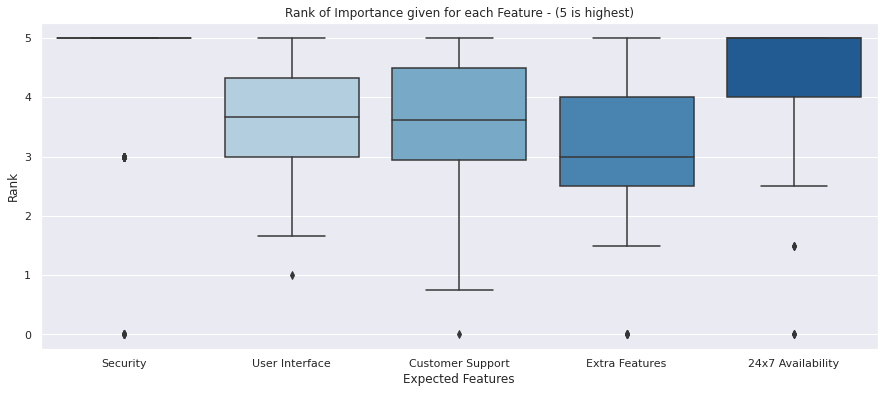

In [488]:
plt.figure(figsize=(15,6))

sns.boxplot(x="variable", y="value", data=pd.melt(mobile_user_requiremtns_cat),palette=("Blues"))
plt.title('Rank of Importance given for each Feature - (5 is highest)')
plt.ylabel('Rank', fontsize=12)
plt.xlabel('Expected Features', fontsize=12)
plt.show()

In [489]:
mobile_user_requiremtns_aggrigated = mobile_user_requiremtns.drop([22, 23, 24, 25, 26, 27, 28, 29, 30, 31],  axis=1)

colomns = ['Security', 'User Interface', 'Customer Support', 'Extra Features', '24x7 Availability']
satisfctory_dict = {'high': {}, 'low': {}}
for index, row in mobile_user_requiremtns_aggrigated.iterrows():
    satisfaction = int(row[32])
    for item in colomns:
        SAT = 'high' if satisfaction >= 4 else 'low' if satisfaction < 4 else None
        if SAT is None:
#             SAT = 'high'
#             if item not in satisfctory_dict[SAT]:
#                 satisfctory_dict[SAT][item] = []
#             satisfctory_dict[SAT][item].append(row[item])
            continue
#             SAT = 'low'
        if item not in satisfctory_dict[SAT]:
            satisfctory_dict[SAT][item] = []
        satisfctory_dict[SAT][item].append(row[item])

satisfctory_dict
for key, val in satisfctory_dict.items():
    print(key)
    for key2, val2 in val.items():
        print(key2)
        print("Mean : {} STD: {} N : {}".format(np.mean(val2), np.std(val2), len(val2)))

high
Security
Mean : 4.43801652892562 STD: 1.245770112533012 N : 121
User Interface
Mean : 3.8484848484848486 STD: 0.925111364998409 N : 121
Customer Support
Mean : 3.5289256198347108 STD: 1.0435704775313592 N : 121
Extra Features
Mean : 3.169421487603306 STD: 1.2018472679197019 N : 121
24x7 Availability
Mean : 4.198347107438017 STD: 1.076571192448037 N : 121
low
Security
Mean : 4.384615384615385 STD: 1.2733034890189885 N : 39
User Interface
Mean : 3.64957264957265 STD: 0.9025090633308922 N : 39
Customer Support
Mean : 3.4871794871794872 STD: 1.308194976289651 N : 39
Extra Features
Mean : 2.8461538461538463 STD: 1.330865566395998 N : 39
24x7 Availability
Mean : 4.102564102564102 STD: 1.051125691936904 N : 39


# Frequency vs Income & Distance

In [490]:
freq_income = df[[6, 12, 13]]
freq_income.head()

,6,12,13
1,"100,000 - 150,000",Weekly – Several Times,100m to 1Km
2,"100,000 - 150,000",Monthly – Several Times,1Km to 5Km
3,"100,000 - 150,000",Weekly – Several Times,more than 5Km
4,"50,000 - 100,000",Daily – Several Times,100m to 1Km
5,"100,000 - 150,000",Weekly – Several Times,100m to 1Km


In [491]:
def income(row):
    inc = str(row[6])
    if '50,000 - 100,000' in inc or 'Below 50,000' in inc:
        return 'low'
    elif '100,000 - 150,000' in inc:
        return 'middle'
    else:
        return 'high'

freq_income['income'] = df.apply (lambda row: income(row), axis=1)
freq_income.head(10)

/home/dulanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,6,12,13,income
1,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle
2,"100,000 - 150,000",Monthly – Several Times,1Km to 5Km,middle
3,"100,000 - 150,000",Weekly – Several Times,more than 5Km,middle
4,"50,000 - 100,000",Daily – Several Times,100m to 1Km,low
5,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle
6,"200,000+",Weekly – Once,1Km to 5Km,high
7,"50,000 - 100,000",Weekly – Several Times,100m to 1Km,low
8,"100,000 - 150,000",Daily – Several Times,less than 100m,middle
9,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle
10,"Below 50,000",Weekly – Several Times,1Km to 5Km,low


In [492]:
def frequency(row):
    freq = str(row[12])
    if 'Daily' in freq:
        return 'daily'
    elif 'Weekly' in freq:
        return 'weekly'
    elif 'Monthly' in freq:
        return 'monthly'
    else:
        return None

freq_income['frequency'] = df.apply (lambda row: frequency(row), axis=1)
freq_income.head(10)

/home/dulanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,6,12,13,income,frequency
1,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle,weekly
2,"100,000 - 150,000",Monthly – Several Times,1Km to 5Km,middle,monthly
3,"100,000 - 150,000",Weekly – Several Times,more than 5Km,middle,weekly
4,"50,000 - 100,000",Daily – Several Times,100m to 1Km,low,daily
5,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle,weekly
6,"200,000+",Weekly – Once,1Km to 5Km,high,weekly
7,"50,000 - 100,000",Weekly – Several Times,100m to 1Km,low,weekly
8,"100,000 - 150,000",Daily – Several Times,less than 100m,middle,daily
9,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle,weekly
10,"Below 50,000",Weekly – Several Times,1Km to 5Km,low,weekly


In [493]:
def distance(row):
    dist = str(row[13])
    if '100m' in dist :
        return 'close'
    elif '5Km' in dist or '1Km' in dist:
        return 'far'
    else:
        return None

freq_income['distance'] = df.apply (lambda row: distance(row), axis=1)
freq_income.head(10)

/home/dulanj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,6,12,13,income,frequency,distance
1,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle,weekly,close
2,"100,000 - 150,000",Monthly – Several Times,1Km to 5Km,middle,monthly,far
3,"100,000 - 150,000",Weekly – Several Times,more than 5Km,middle,weekly,far
4,"50,000 - 100,000",Daily – Several Times,100m to 1Km,low,daily,close
5,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle,weekly,close
6,"200,000+",Weekly – Once,1Km to 5Km,high,weekly,far
7,"50,000 - 100,000",Weekly – Several Times,100m to 1Km,low,weekly,close
8,"100,000 - 150,000",Daily – Several Times,less than 100m,middle,daily,close
9,"100,000 - 150,000",Weekly – Several Times,100m to 1Km,middle,weekly,close
10,"Below 50,000",Weekly – Several Times,1Km to 5Km,low,weekly,far


In [494]:
freq_income_only = freq_income.drop([6,12, 13], axis=1)
freq_income_only.head()

,income,frequency,distance
1,middle,weekly,close
2,middle,monthly,far
3,middle,weekly,far
4,low,daily,close
5,middle,weekly,close


In [495]:
freq_income_only.groupby(['income', 'frequency']).size()

income  frequency
high    daily         7
        monthly      11
        weekly       21
low     daily         7
        monthly      25
        weekly       35
middle  daily         6
        monthly      17
        weekly       29
dtype: int64

In [496]:
freq_income_only.groupby(['distance', 'frequency']).size()

distance  frequency
close     daily         6
          monthly      14
          weekly       25
far       daily        14
          monthly      39
          weekly       60
dtype: int64

# Visualizations

In [497]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38],
           dtype='int64')

In [498]:
def pie_chart(col_no):
    out = df[col_no].value_counts()
    print(out)
    out.plot.pie(figsize=(10, 10), shadow = True, startangle=90, autopct='%1.1f%%')

In [499]:
def bar_chart(col_no):
    out = df[col_no].value_counts()
    print(out)
    out.plot.bar(figsize=(16, 8))

In [500]:
def func_reorder(lst, order):
    print("Func reorder")
    new_list = []
    for i in order:
        new_list.append(lst[i])
    print(lst)
    print(new_list)
    return new_list

# Usage Propotion Chart
def bar_chart_v2(col_no, title='Propotion of Mobile Application Usage', y_label="", x_label="Number of Respondents", reorder=None):
    plt.title(title)
    sns.set(rc={'figure.figsize':(10,8)})
    ax = sns.countplot(df[col_no], order=reorder)
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)
#     patch_list = ax.patches if reorder is None else func_reorder(ax.patches, reorder)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 1,
                '{:1.2f}%'.format(height/total_responses * 100),
                ha="center")

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


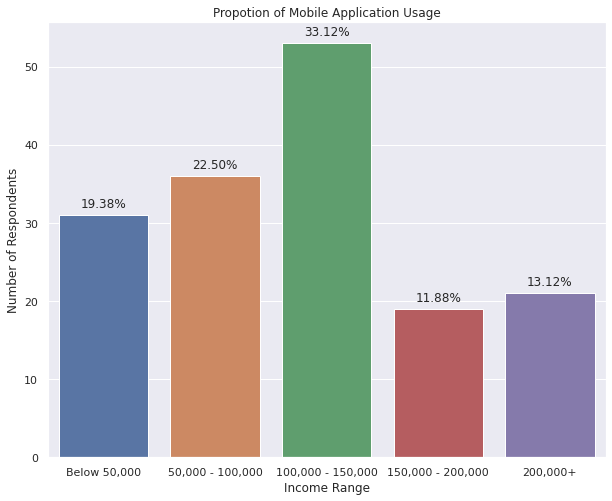

In [501]:
bar_chart_v2(6, y_label="Income Range", reorder=["Below 50,000", "50,000 - 100,000", "100,000 - 150,000", "150,000 - 200,000", "200,000+"])

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


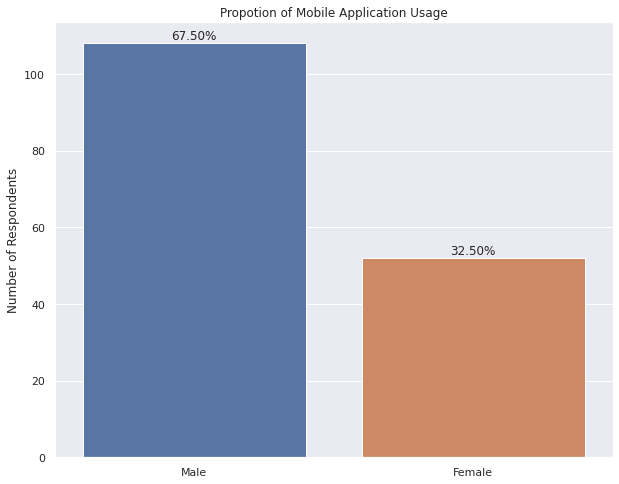

In [502]:
bar_chart_v2(1)

Male      108
Female     52
Name: 1, dtype: int64


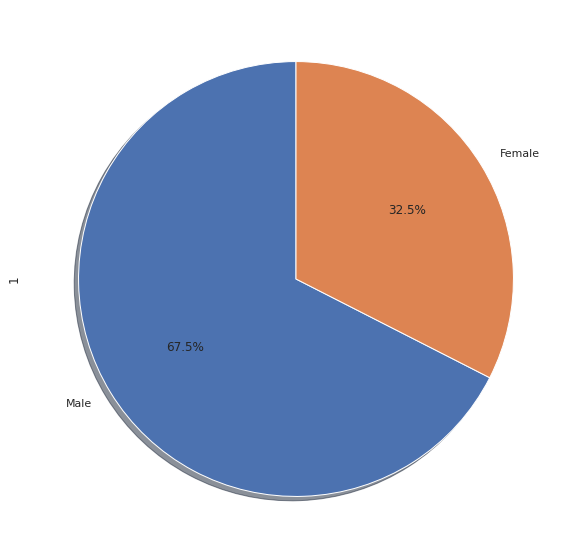

In [503]:
pie_chart(1)

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


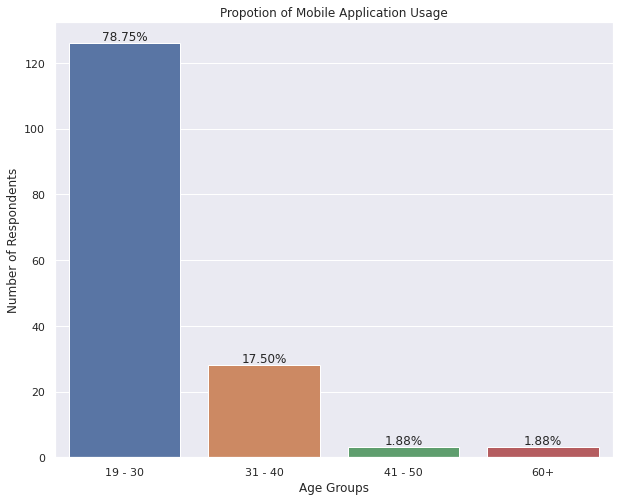

In [504]:
bar_chart_v2(2,y_label="Age Groups")

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


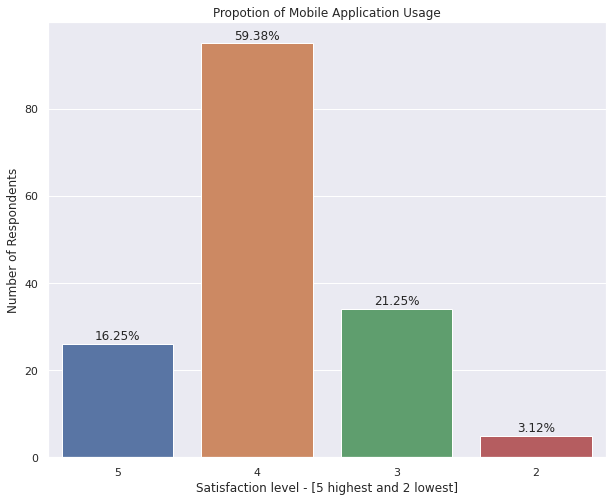

In [505]:
bar_chart_v2(32,y_label="Satisfaction level - [5 highest and 2 lowest]")

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


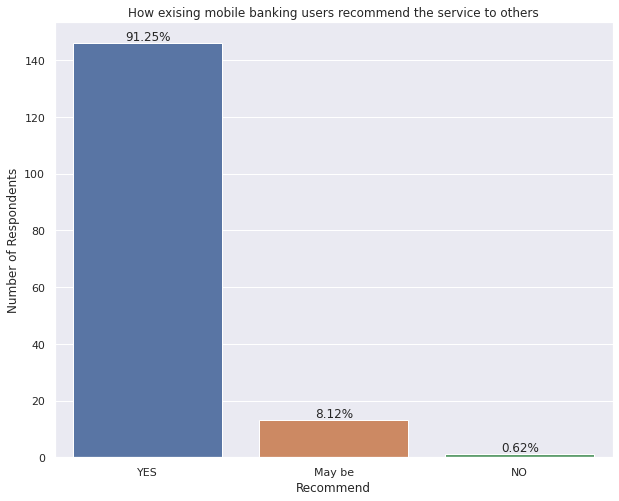

In [518]:
bar_chart_v2(33,title="How exising mobile banking users recommend the service to others", y_label="Recommend")

Colombo         65
Gampaha         20
Kalutara        16
Kurunegala      12
Kandy           11
Galle           10
Ratnapura        5
Matara           4
Kegalle          4
Hambantota       3
Badulla          2
Puttalam         2
Moneragala       2
Nuwara Eliya     2
Vavuniya         1
Jaffna           1
Name: 3, dtype: int64


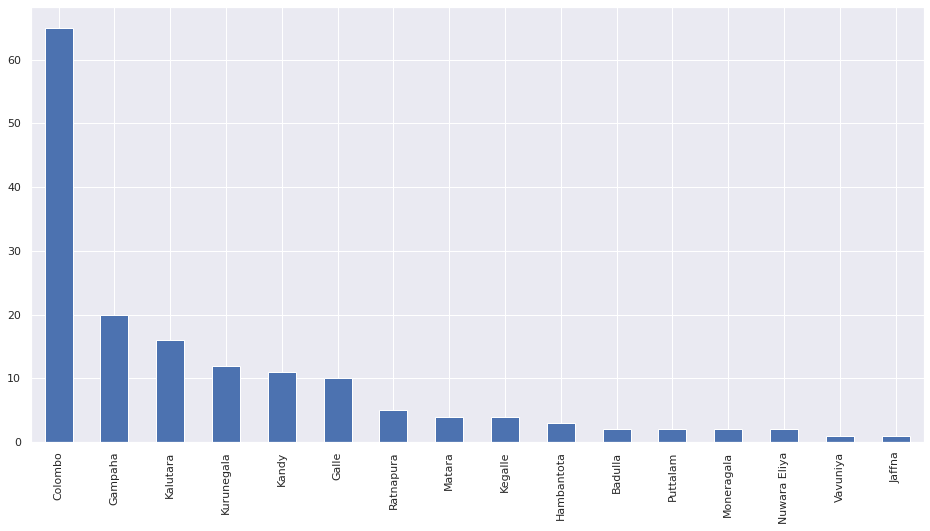

In [507]:
bar_chart(3)

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


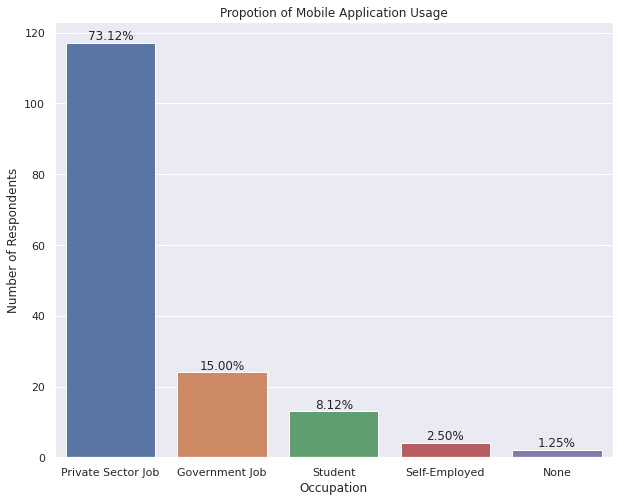

In [508]:
bar_chart_v2(4,y_label="Occupation")

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


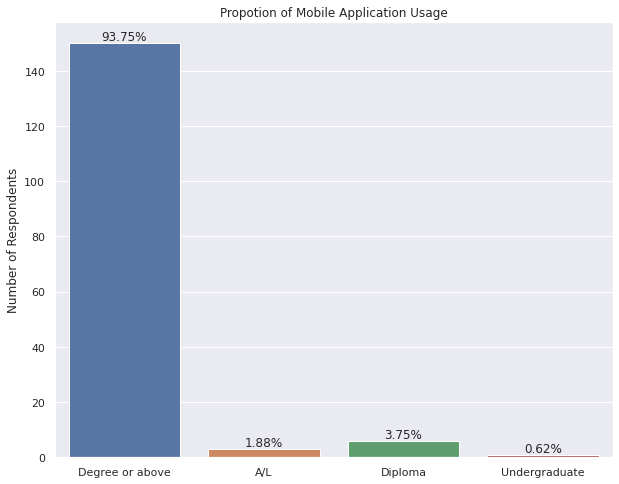

In [509]:
bar_chart_v2(5)

/home/dulanj/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


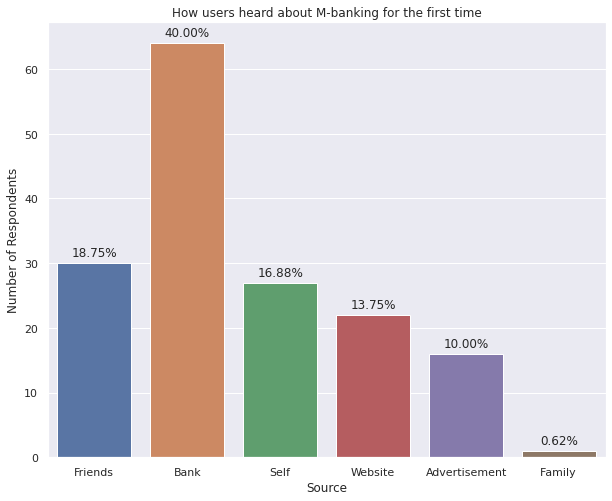

In [519]:
bar_chart_v2(7, title="How users heard about M-banking for the first time", y_label="Source")

One year to five years    112
Less than a year           33
5 years or more            15
Name: 8, dtype: int64


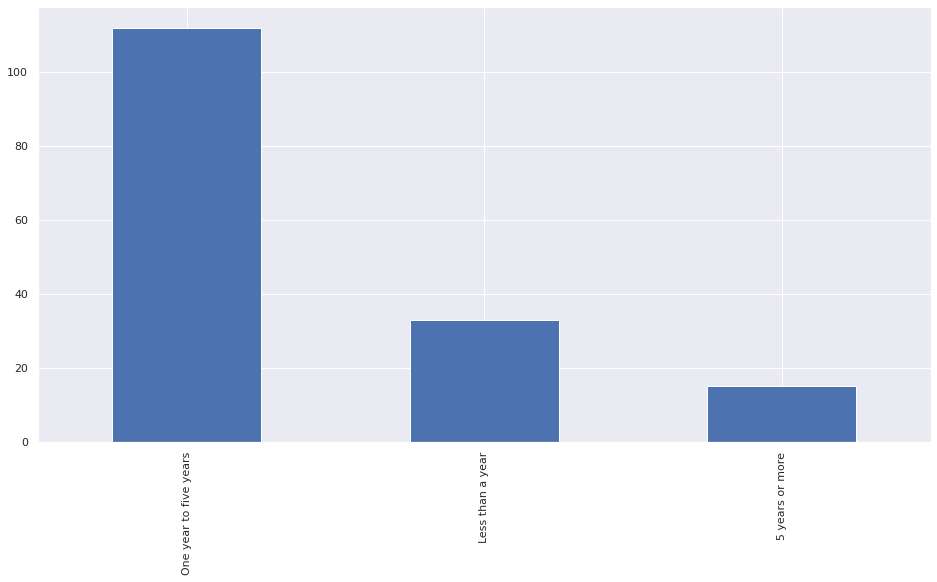

In [511]:
bar_chart(8) 

1Km to 5Km        80
100m to 1Km       36
more than 5Km     35
less than 100m     9
Name: 13, dtype: int64


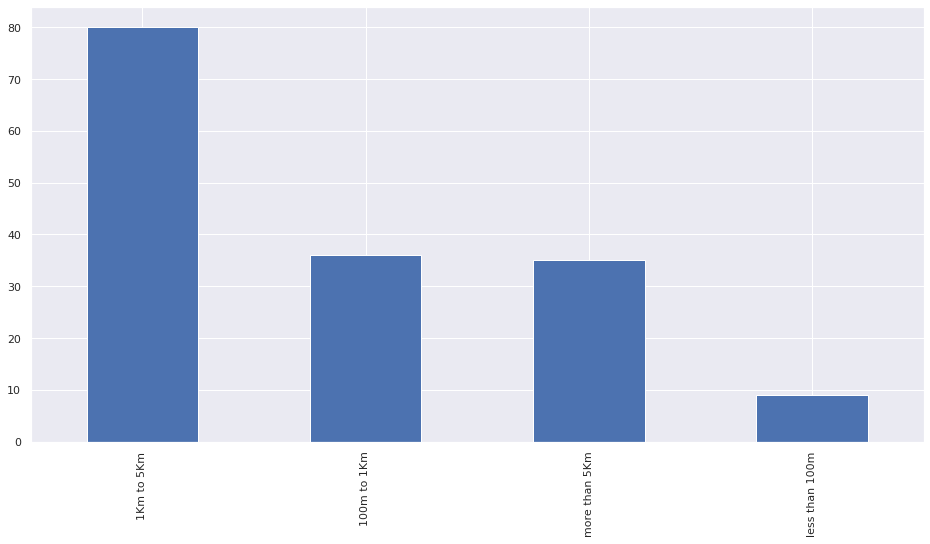

In [512]:
bar_chart(13) 

In [513]:
def get_item_list(col_no):
    item_dict = {}
    for value in df[col_no]:
        for item in value.split(';'):
            if item not in item_dict:
                item_dict[item] = 0
            else:
                item_dict[item] += 1

    return item_dict

In [514]:
get_item_list(34)

{'Ease of access': 145,
 '24/7 account and service access': 142,
 'Online bill payment': 130,
 'Speed and efficiency': 122,
 'Low fees': 26,
 'many other ': 0}

In [515]:
get_item_list(35)

{'Technology issues': 92,
 'Security issues': 86,
 'Inconvenient to make deposits': 48,
 'Inefficient at complex transactions': 61,
 'No relationship with personal banker': 21,
 'bank gets a commission in every transaction': 0,
 'Fees charged is flat irrespective of the amount transferred,  so not suitable for small amount transactions ': 0,
 'No account number verification process when depositing money': 0,
 "Apps aren't user friendly": 0,
 'Fees': 0,
 'Somewaht high service charges': 0,
 'less number of participants and transaction fees': 0,
 'unreasonably higher fees': 0}

In [516]:
get_item_list(36)

{'Keep it Simple': 131,
 'Lightweight and speed': 98,
 'Add more features': 76,
 'More value added services': 68,
 'Better User Interface': 113,
 'stability': 0,
 'Provide dash boards or graphical representations to analyse the transactions ': 0,
 'should bring down the transaction fees': 0}